<a href="https://colab.research.google.com/github/taimoorsardar/Deep-Learning-Projects/blob/main/CnnClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2 # for data augmentation
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
# Convert class vectors to binary class matrices (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

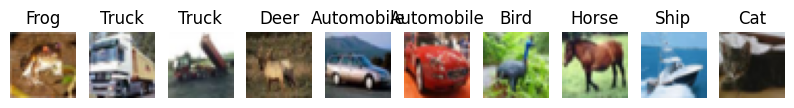

In [ ]:
# Function to display images
def plot_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(10, 2))
    for i in range(num_images):
        plt.subplot(1, num_images, i+1)
        plt.imshow(images[i])
        plt.title(class_names[np.argmax(labels[i])])
        plt.axis('off')
    plt.show()

# Define CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Display some sample images from the original training set
plot_images(x_train, y_train, class_names)


In [ ]:
def random_rotation(image):
    angle = np.random.uniform(-15, 15)
    h, w = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
    return rotated_image

In [ ]:
def random_flip(image):
      return cv2.flip(image, 1)

In [ ]:
def random_shift(image):
    h, w = image.shape[:2]
    max_shift = 0.3* h  # Randomly shift the image along x or y axis by up to 50% of the image size
    tx = np.random.uniform(-max_shift, max_shift)
    ty = np.random.uniform(-max_shift, max_shift)
    translation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    shifted_image = cv2.warpAffine(image, translation_matrix, (w, h))
    return shifted_image

In [ ]:
def random_zoom(image, zoom_range=(0.7, 1.4)):
    h, w = image.shape[:2]
    zoom_factor = np.random.uniform(zoom_range[0], zoom_range[1])  # Randomly zoom the image within the zoom range
    zoomed_image = cv2.resize(image, None, fx=zoom_factor, fy=zoom_factor)

    if zoom_factor < 1.0:  # Crop or pad to the original size
        pad_h = (h - zoomed_image.shape[0]) // 2
        pad_w = (w - zoomed_image.shape[1]) // 2
        zoomed_image = cv2.copyMakeBorder(zoomed_image, pad_h, pad_h, pad_w, pad_w, cv2.BORDER_CONSTANT)
    else:
        zoomed_image = zoomed_image[(zoomed_image.shape[0] - h) // 2:(zoomed_image.shape[0] + h) // 2,
                                    (zoomed_image.shape[1] - w) // 2:(zoomed_image.shape[1] + w) // 2]
    return cv2.resize(zoomed_image, (w, h))  # Resize back to original size

In [ ]:
def augment_image(image):
    # Apply each augmentation technique with a certain probability
    image = random_rotation(image)
    image = random_flip(image)
    image = random_shift(image)
    image = random_zoom(image)
    return image

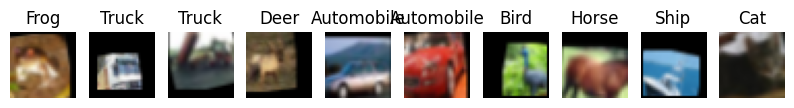

In [ ]:
# Display augmented images
augmented_samples = [augment_image(x_train[i]) for i in range(10)]  # Create augmented samples
augmented_samples = np.array(augmented_samples)

# Display the augmented images
plot_images(augmented_samples, y_train[:10], class_names)

In [ ]:
def plot_augmentation_steps(image):
    plt.figure(figsize=(15, 4))

    # Original image
    plt.subplot(1, 5, 1)
    plt.imshow(image)
    plt.title('Original')
    plt.axis('off')

    # Rotated image
    plt.subplot(1, 5, 2)
    plt.imshow(random_rotation(image, ))
    plt.title('Rotated')
    plt.axis('off')

    # Flipped image
    plt.subplot(1, 5, 3)
    plt.imshow(random_flip(image))
    plt.title('Flipped')
    plt.axis('off')

    # Shifted image
    plt.subplot(1, 5, 4)
    plt.imshow(random_shift(image))
    plt.title('Shifted')
    plt.axis('off')

    # Zoomed image
    plt.subplot(1, 5, 5)
    plt.imshow(random_zoom(image))
    plt.title('Zoomed')
    plt.axis('off')

    plt.show()

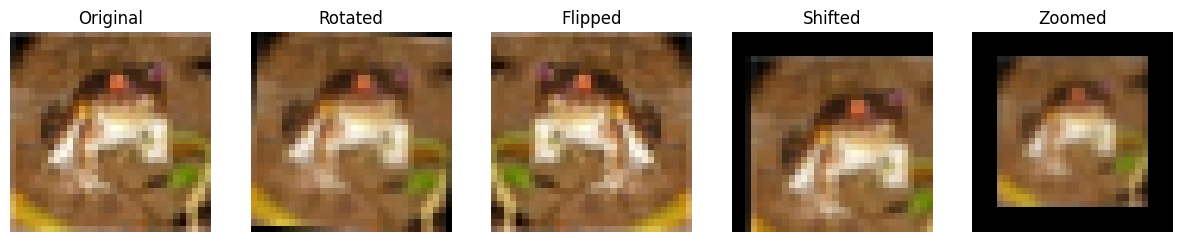

In [ ]:
# Pick a random image from the training set
sample_image = x_train[0]
plot_augmentation_steps(sample_image)  # Visualize each augmentation step

In [ ]:
# Augment the entire training set
augmented_images = []
augmented_labels = []
for i in range(x_train.shape[0]):
    augmented_images.append(augment_image(x_train[i]))
    augmented_labels.append(y_train[i])

augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)

In [ ]:
model = models.Sequential()

# Add convolutional and pooling layers
model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2))

model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.4))

model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.5))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(
    optimizer=optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    augmented_images, augmented_labels,
    epochs=50,
    validation_data=(x_test, y_test),
    batch_size=64
)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 22ms/step - accuracy: 0.1758 - loss: 2.1469 - val_accuracy: 0.2872 - val_loss: 1.9133
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2952 - loss: 1.8555 - val_accuracy: 0.3378 - val_loss: 1.7828
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3406 - loss: 1.7495 - val_accuracy: 0.4199 - val_loss: 1.5643
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3655 - loss: 1.7009 - val_accuracy: 0.4474 - val_loss: 1.4949
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3926 - loss: 1.6555 - val_accuracy: 0.4369 - val_loss: 1.5906
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.3941 - loss: 1.6501 - val_accuracy: 0.4785 - val_loss: 1.4343
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.4104 - loss: 1.6181 - val_accuracy: 0.4544 - val_loss: 1.5068
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4147 - loss: 1.5919 - val_accuracy: 

In [ ]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5425 - loss: 1.2961
Test loss: 1.2969, Test accuracy: 0.5386


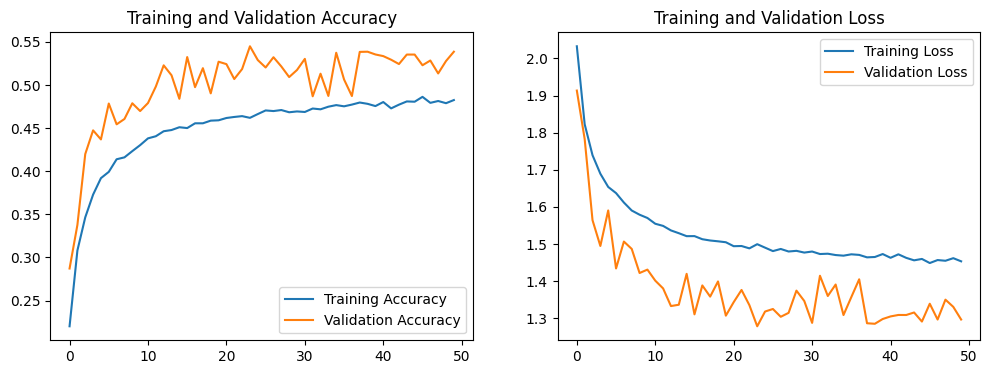

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()